In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

COLORS = ['r', 'g', 'b', 'c', 'm', 'y', 'purple', 'lime', 'pink', 'yellow', 'orange', 'brown']

In [3]:
def plot(data, ax, title):

    for i in range(len(data)):
        ax.scatter(data[i][0], data[i][1], color=COLORS[i], alpha=0.5)
        ax.set_title(title)


def load_data(directory, num_classes, delimiter=','):
    data = []
    for i in range(1, num_classes + 1):
        d = pd.read_csv(f'{directory}/class{i}.txt', header=None, delimiter=delimiter)
        data.append(d)
        d['class'] = i - 1
    
    data.append(pd.concat(data).reset_index(drop=True))
    return tuple(data)

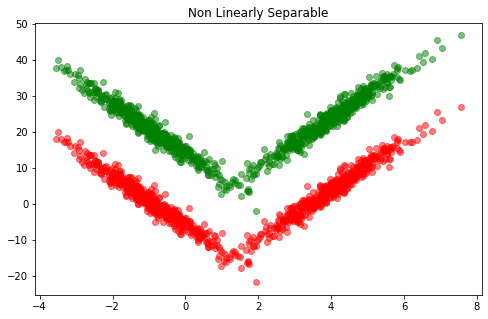

In [4]:
nls_c1, nls_c2, nls = load_data('./nls_data', 2)

fig, ax = plt.subplots(1, 1, figsize=(8, 5))
plot((nls_c1, nls_c2), ax, "Non Linearly Separable")

In [5]:
from sklearn.model_selection import train_test_split

def split_data(X):
    y = X['class']
    X.drop('class', axis = 1, inplace=True)
    return (spl_data.to_numpy() for spl_data in train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42))

nls_x_train, nls_x_test, nls_y_train, nls_y_test = split_data(nls)

In [28]:
class KMeans:
    def __init__(self, n_clusters=8, max_iter=300, viz=False):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.curr_iter = 0
        self.cluster_centers = None
        self.viz = viz
        
    def fit(self, X):
        # Choosing random points as cluster centers.
        indices = np.random.choice(X.shape[0], self.n_clusters)
        self.cluster_centers = np.float32(X[indices])

        cluster_assignments = self.assign_clusters(X)
        self.show_clusters(X, cluster_assignments) if self.viz else None
        
        while self.curr_iter < self.max_iter:
            self.curr_iter += 1
            # Update cluster centers using the mean of cluster points.
            self.update_centers(X, cluster_assignments)

            # Assigning new clusters based on the updated cluster centers.
            new_assignments = self.assign_clusters(X)
            
            # If no change, then break.
            flag = np.all(new_assignments == cluster_assignments)
            if (flag):
                print(cluster_assignments.shape)
                break
            
            # Update the cluster assignments.
            cluster_assignments = new_assignments
            self.show_clusters(X, cluster_assignments) if self.viz else None
            
    def update_centers(self, X, cluster_assignments):
        for i in range(self.n_clusters):
            self.cluster_centers[i] = np.mean(X[cluster_assignments == i], axis=0)   
            
    def show_clusters(self, X, cluster_assignments):
        fig, ax = plt.subplots(1, 1)
        for i in range(self.n_clusters):
            ax.scatter(X[cluster_assignments == i, 0],
                        X[cluster_assignments == i, 1],
                        color=COLORS[i],
                        alpha=0.5)

            ax.scatter(self.cluster_centers[i][0],
                        self.cluster_centers[i][1],
                        color=COLORS[i],
                        s=300,
                        edgecolors='k')
        ax.set_title(f"Clusters after {self.curr_iter} iterations.")
        plt.show()
        
    def assign_clusters(self, X):
        cluster_assignments = None
        
        min_dist = np.array([float('inf')] * X.shape[0])
        for i in range(self.n_clusters):
            # Distance of each point from the ith cluster center.
            dist = np.sqrt(np.sum((X - self.cluster_centers[i])**2, axis=1))
            
            # Assigning ith cluster to the points where distance is lesser
            # than the previous assignment.
            cluster_assignments = np.where(dist < min_dist, i, cluster_assignments)
            
            # Updating the minimum distance for points.
            min_dist = np.where(dist < min_dist, dist, min_dist)
     
        return cluster_assignments
    
    def segment_img(self, img, scale=1):
        # Convert cluster centers to pixel values.
        # Scale parameter for the 2nd part of Q2, to scale back values from [0, 1] to [0, 255]
        clusters = np.uint8(scale * self.cluster_centers[:, :3])
        print(clusters)
        # Assign cluster to each pixel.
        cluster_assignments = self.assign_clusters(img)
        print(cluster_assignments)
        # Create segmented image with cluster values as pixel values.
        segmented = clusters[np.uint8(cluster_assignments)]
        print(segmented)
        return segmented

    def accuracy(self, x_train, y_train, x_test, y_test):
        train_pred = self.assign_clusters(x_train)
        test_pred = self.assign_clusters(x_test)
        acc = sum(test_pred == y_test)/len(test_pred)

        # Do note that the 0/1 class number in the nls_y_test may vary from the 0/1 cluster number from the cluster assignment 
        # Code can be run multiple times to verify that in both cases, correct accuracy is being returned
        # Class 0 matches Cluster 0, Class 1 matches Cluster 1
        if train_pred[0] == y_train[0]:
            print("Class number matches cluster number")
            return acc
        # Class 0 matches Cluster 1, Class 1 matches Cluster 0
        else:
            print("Class number differs from cluster number")
            return 1 - acc


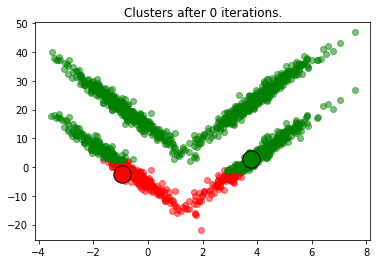

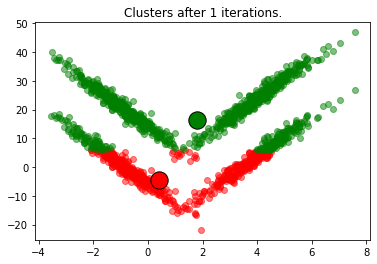

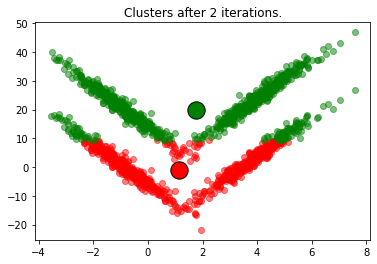

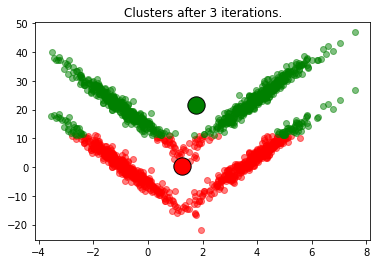

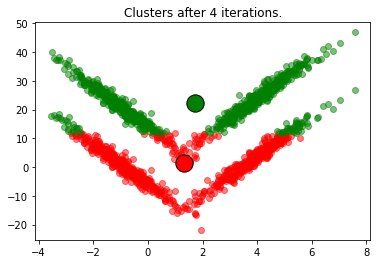

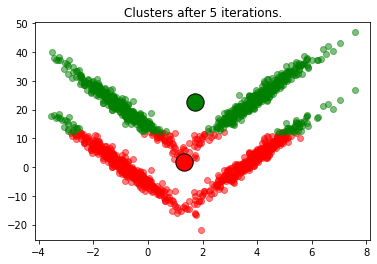

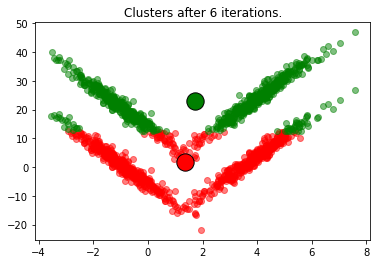

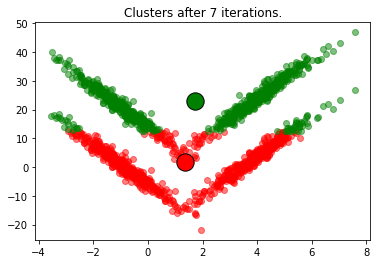

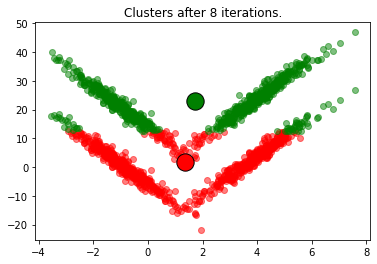

In [7]:
m1 = KMeans(2, viz=True)
m1.fit(nls_x_train)

In [8]:
m1.accuracy(nls_x_train, nls_y_train, nls_x_test, nls_y_test)

Class number matches cluster number


0.9125

In [29]:
from PIL import Image

raw_img = Image.open('Image.jpg')
raw_img = np.asarray(raw_img)
img = raw_img.reshape((-1,3))

In [30]:
m2 = KMeans(2, viz=False)
m2.fit(img)

(1707200,)


[[197 187 126]
 [ 95  70  20]]
[1 1 1 ... 0 0 0]
[[ 95  70  20]
 [ 95  70  20]
 [ 95  70  20]
 ...
 [197 187 126]
 [197 187 126]
 [197 187 126]]
(1067, 1600, 3)


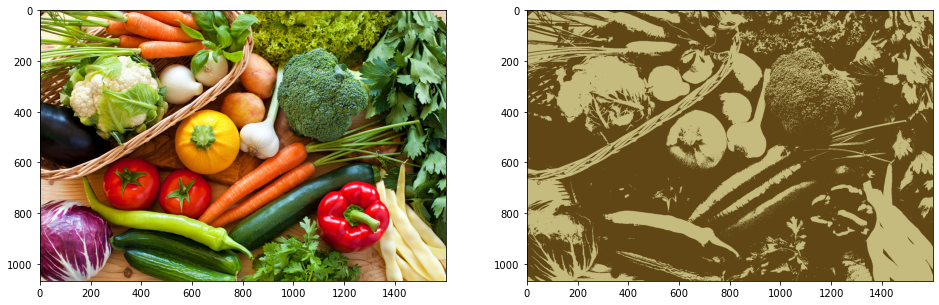

In [32]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))

ax[0].imshow(img.reshape(raw_img.shape))
segmented1 = m2.segment_img(img).reshape(raw_img.shape)
print(segmented1.shape)
ax[1].imshow(segmented1)

In [12]:
m3 = KMeans(3, viz=False)
m3.fit(img)

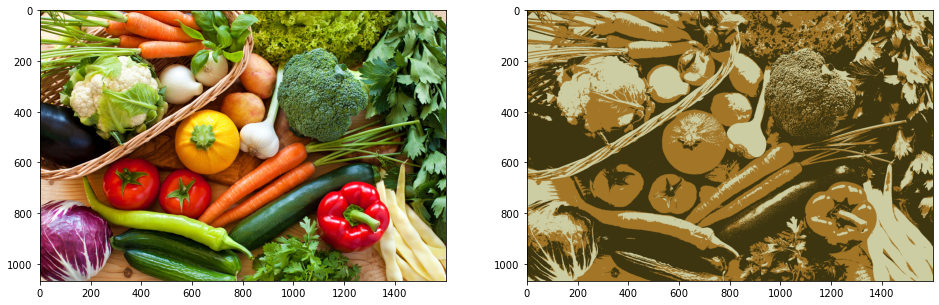

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))

ax[0].imshow(img.reshape(raw_img.shape))
segmented2 = m3.segment_img(img).reshape(raw_img.shape)
ax[1].imshow(segmented2)

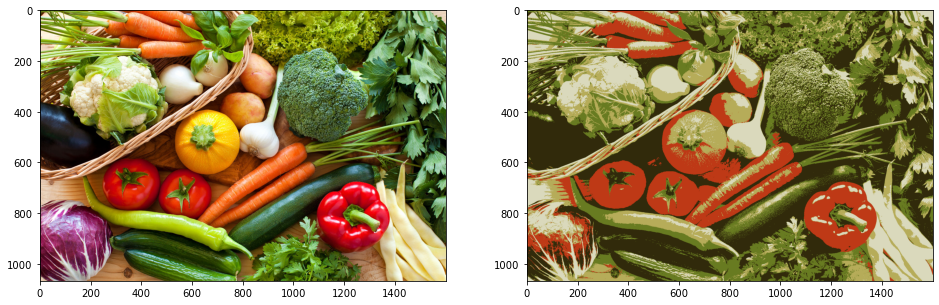

In [14]:
m4 = KMeans(5, viz=False)
m4.fit(img)

fig, ax = plt.subplots(1, 2, figsize=(16, 5))

ax[0].imshow(img.reshape(raw_img.shape))
segmented3 = m4.segment_img(img).reshape(raw_img.shape)
ax[1].imshow(segmented3)

In [15]:
data = np.zeros((raw_img.shape[0], raw_img.shape[1], 5))

for i in range(raw_img.shape[0]):
    for j in range(raw_img.shape[1]):
        pixel = raw_img[i][j]
        data[i][j] = np.array([pixel[0]/255, pixel[1]/255, pixel[2]/255, i/raw_img.shape[0], j/raw_img.shape[1]])

data = data.reshape((-1, 5))

In [16]:
m5 = KMeans(10, viz=False)
m5.fit(data)

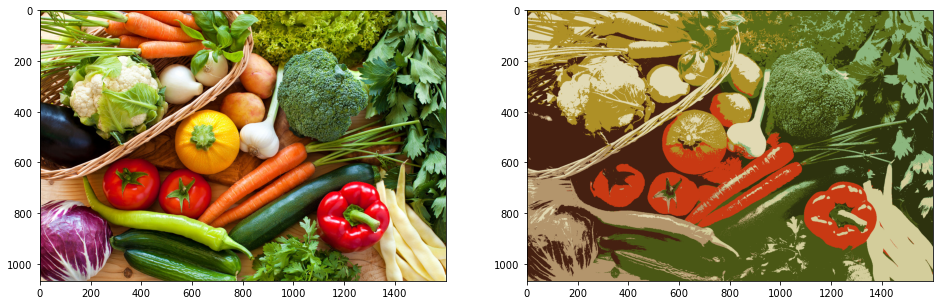

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))

ax[0].imshow(img.reshape(raw_img.shape))
segmented1 = m5.segment_img(data, scale=255).reshape(raw_img.shape)
ax[1].imshow(segmented1)